<a href="https://colab.research.google.com/github/shashankbhagat/Clustering-Algorithms/blob/master/k_mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df=pd.DataFrame({'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]})

In [51]:
#initialisation stage

np.random.seed(200)
k=3
max_x,max_y=max(df['x']),max(df['y'])
centroids={i+1:[np.random.randint(0,max_x+1),np.random.randint(0,max_y)] for i in range(k)}
centroids

{1: [26, 16], 2: [68, 42], 3: [55, 14]}

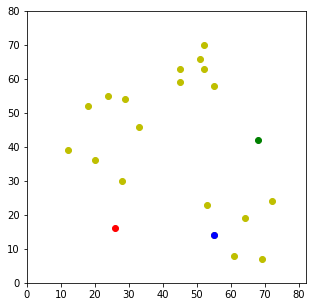

In [52]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],c='y')
colmap={1:'r',2:'g',3:'b'}
for i in centroids.keys():
  plt.scatter(*centroids[i],c=colmap[i])
plt.xlim(0,max_x+10)
plt.ylim(0,max_y+10)
plt.show()

In [53]:
# assignment stage

def assignment(df,centroids):
  #euclidean distance
  #sqrt((x2-x1)^2 + (y2-y1)^2)
  for i in centroids.keys():
    df['distance_from_%s' %(i)]=(
        np.sqrt(
            (df['x']-centroids[i][0])**2
        + (df['y']-centroids[i][1])**2
        )
    )
  #print(df.head())
  centroid_distance_cols=['distance_from_%s'%(i) for i in centroids.keys()]
  #print(centroid_distance_cols)
  df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
  df['closest']=df['closest'].map(lambda x:
                                   int(x.lstrip('distance_from_'))
                                   )
  df['color']= list(map(lambda x:colmap[x],df['closest']))
  #df['closest'].map(lambda x:colmap[x])
  #print(df.head())
  return df

df=assignment(df,centroids)
print(df.head())
  

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        49.739320        1     r
1  20  36        20.880613        48.373546        41.340053        1     r
2  28  30        14.142136        41.761226        31.384710        1     r
3  18  52        36.878178        50.990195        53.037722        1     r
4  29  54        38.118237        40.804412        47.707442        1     r


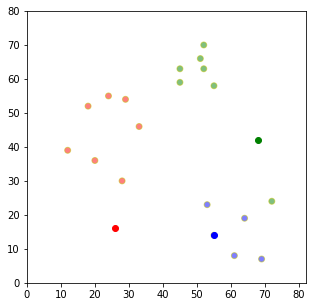

In [54]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],c=df['color'],alpha=0.5,edgecolors='y')
for i in centroids.keys():
  plt.scatter(*centroids[i],c=colmap[i])
plt.xlim(0,max_x+10)
plt.ylim(0,max_y+10)
plt.show()

In [55]:
# update stage
import copy
old_centroids=copy.deepcopy(centroids)

def update(centroids):
  for i in centroids.keys():
    centroids[i][0]=np.mean(df[df['closest']==i]['x'])
    centroids[i][1]=np.mean(df[df['closest']==i]['y'])
  return centroids

centroids=update(centroids)
print(centroids,old_centroids)


{1: [23.428571428571427, 44.57142857142857], 2: [53.142857142857146, 57.57142857142857], 3: [60.4, 14.2]} {1: [26, 16], 2: [68, 42], 3: [55, 14]}


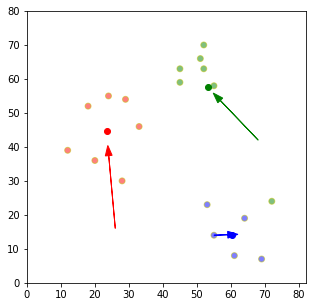

In [56]:
fig=plt.figure(figsize=(5,5))
ax=plt.axes()
plt.scatter(df['x'],df['y'],c=df['color'],alpha=0.5,edgecolors='y')
for i in centroids.keys():
  plt.scatter(*centroids[i],c=colmap[i])
plt.xlim(0,max_x+10)
plt.ylim(0,max_y+10)

for i in old_centroids.keys():
  old_x=old_centroids[i][0]
  old_y=old_centroids[i][1]
  dx=(centroids[i][0]-old_centroids[i][0])*0.75
  dy=(centroids[i][1]-old_centroids[i][1])*0.75
  ax.arrow(old_x,old_y,dx,dy,head_width=2,head_length=3,fc=colmap[i],ec=colmap[i])
plt.show()

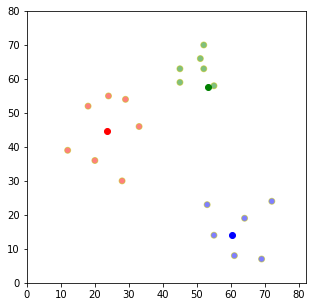

In [57]:
# repeat assignment step

df=assignment(df,centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],c=df['color'],alpha=0.5,edgecolors='y')
for i in centroids.keys():
  plt.scatter(*centroids[i],c=colmap[i])
plt.xlim(0,max_x+10)
plt.ylim(0,max_y+10)
plt.show()

2 iterations to converge.


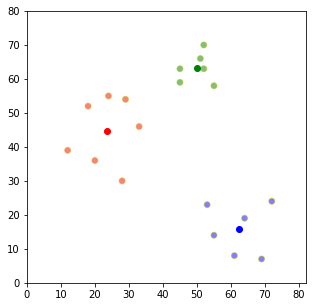

In [58]:
# continue until no more changes
cnt=1
while True:
  cnt+=1
  closest_centroids=df['closest'].copy(deep=True)
  centroids=update(centroids)
  df=assignment(df,centroids)
  if closest_centroids.equals(df['closest']):
    break
print('%s iterations to converge.'%(cnt))
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],c=df['color'],alpha=0.5,edgecolors='y')
for i in centroids.keys():
  plt.scatter(*centroids[i],c=colmap[i])
plt.xlim(0,max_x+10)
plt.ylim(0,max_y+10)
plt.show()

In [0]:
from sklearn.cluster import KMeans

df1 = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

In [60]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
label=kmeans.predict(df1)
centroids1=kmeans.cluster_centers_
print(label)
print(centroids1)

[1 1 1 1 1 1 1 2 2 2 2 2 2 0 0 0 0 0 0]
[[62.33333333 15.83333333]
 [23.42857143 44.57142857]
 [50.         63.16666667]]


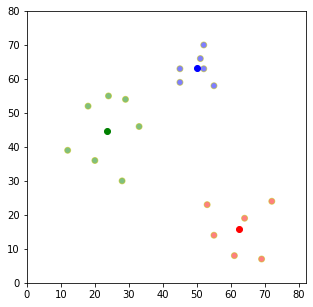

In [63]:
fig=plt.figure(figsize=(5,5))
colors=list(map(lambda x:colmap[x+1],label))

plt.scatter(df1['x'],df1['y'],c=colors,alpha=0.5,edgecolors='y')
for i,val in enumerate(centroids1):
  plt.scatter(*centroids1[i],c=colmap[i+1])
plt.xlim(0,max_x+10)
plt.ylim(0,max_y+10)
plt.show()